# <center><font color="green"> https://bit.ly/ptpjb-2021-08</font><br><font color="blue">08 - Regression Analysis</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Outline - Regression Analysis</font></center>

* Pengantar ke Predictive Modelling
* Korelasi
* Regresi
* Evaluasi dan Interpretasi Model Regresi

<img alt="" src="images/alur_module_08.png" style="height: 250px;"/>

# <center><font color="blue">Pendahuluan Model Regresi</font></center>

* Digunakan saat variabel tak bebas (**Dependent variable** - Y) bertipe **numerik** (float/real) dan variabel bebasnya bisa numerik dan-atau kategorik

<img alt="" src="images/Supervised_Methods.png" style="height: 350px;"/>

# <center><font color="blue">Berawal dari Pusat data dan Variansi</font></center>

<p style="text-align:center;font-size:24px">$\bar{x}=\sum_{i=1}^{N}{x_i}$ dan $s^2=\frac{\sum_{i=1}^{N}{(x_i-\bar{x})}}{N-1}$ </p>

* Perhatikan makna rumus/formula variansi, lalu bandingkan dengan formula "covariansi" berikut:

# <center><font color="blue">Variance ke Covariance: Menghitung Hubungan Linear antara 2 variabel</font></center>

- How? Bagaimana cara kerjanya? (Statistical Thinking)
- Konsepnya: "Co-Vary" sama-sama bervariansi menjauh dari rata-rata.
- Gunakan "reverse" thinking untuk memahaminya.
- Penggunaan: cov(x,y) = 2 VS cov(x,y) = -2 VS Cov(x,y) = 0
- Covariance = 3000? Apa artinya?

<img src="images/covariance.png" style="height: 75px;"/>

# <center><font color="blue">Covariance ke korelasi: Statistical Thinking</font></center>

- Korelasi sebenarnya adalah Covariance dibagi dengan masing-masing standar deviasinya.
- Apa maksud/maknanya?
- Covariance punya makna geometric .... ia adalah Cosine!... 
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Geometric_interpretation

<img src="images/korelasi_pearson_formulae.png" style="height: 100px;"/>

# <center><font color="blue">Nilai koefisien korelasi (Linear) "Pearson"</font></center>

- Nilai dari koefisien korelasi Pearson adalah dari -1 hingga +1

<img src="images/korelasi_pearson_01.png" width ="400"/>

### Hati-hati

- Koefisien korelasi = 0 bukan berarti tidak ada hubungan antara kedua variable. Yang benar adalah: tidak ada hubungan LINIER, tapi bisa jadi ada hubungan dalam bentuk lain; misal: kuadratik, atau fungsi lain selain linier, seperti pada contoh di atas.

# <center><font color="blue">Korelasi dan Sebab-Akibat</font></center>

<img src="images/meme-cartoon/corr_causation_meme.jpg"  width ="400"/>

* Semua orang yang minum air putih mati

# <center><font color="blue">Penilaian Kualitatif terhadap nilai korelasi seperti ini? ... Really? Why? Why not?</font></center>

<img src="images/Corr_interpretation.png" width ="400"/>

- image Source: https://spencermath.weebly.com/home/interpreting-the-correlation-coefficient
- Cases (social, medicine, etc)
- Objective, prediction vs insights

# <center><font color="blue">Contoh kasus sederhana</font></center>

<img src="images/contoh_korelasi.png" width ="400"/>

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh'); sns.set()
"Done"

'Done'

In [2]:
data = {'usia':[40, 45, 50, 53, 60, 65, 69, 71], 'tekanan_darah':[126, 124, 135, 138, 142, 139, 140, 151]}
df = pd.DataFrame.from_dict(data)
df.head(8)

,usia,tekanan_darah
0,40,126
1,45,124
2,50,135
3,53,138
4,60,142
5,65,139
6,69,140
7,71,151


Covariance =  76.953125
Correlations =  [[1.         0.88746015]
 [0.88746015 1.        ]]


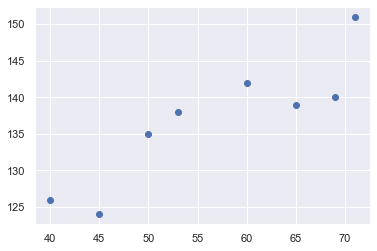

In [3]:
# Korelasi dan Scatter Plot untuk melihat datanya
print('Covariance = ', np.cov(df.usia, df.tekanan_darah, ddof=0)[0][1])
print('Correlations = ', np.corrcoef(df.usia, df.tekanan_darah))
plt.scatter(df.usia, df.tekanan_darah)
plt.show()

                  usia  tekanan_darah
usia           1.00000        0.88746
tekanan_darah  0.88746        1.00000


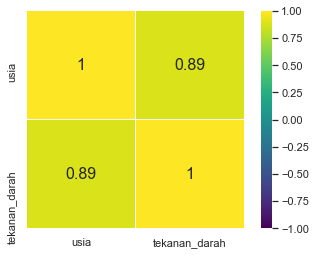

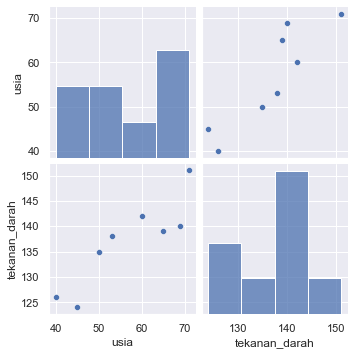

In [4]:
# Better
print(df.corr())
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 16}, square=True)
p = sns.pairplot(df)

# <center><font color="blue">Interpretasi</font></center>

- Nilai ~0.95 menunjukkan bahwa ada korelasi linier positif yang kuat antara usia dan tekanan darah. Ada kecenderungan bahwa usia tinggi berkaitan dengan tekanan darah yang kebih tinggi dibandingkan usia rendah.
- **WARNING**
- **Korelasi tidak sama (meng-implikasikan) dengan sebab akibat**. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

- Contoh lain penelitian di Machine learning (kecantikan dan confidence/Panjang Jari dan IQ)

## WARNING
- Korelasi tidak sama dengan sebab akibat. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

- Sampai sini kita memahami kalau keduanya berhubungan, tapi seperti apa hubungannya kita masih belum bisa ketahui (lewat korelasi). Itulah Mengapa kita perlu Model Regresi.

# <center><font color="blue">Regresi Linier Sederhana</font></center>

<img src="images/Reg_sederhana_01.png" width ="600"/>

# <center><font color="blue">Korelasi ke Regresi</font></center>

<img src="images/reg_eq.png" width ="600"/>

# <center><font color="blue">Bagaimana menghitung parameter Regresi yang Optimal?</font></center>

* Kenapa rumusnya seperti ini?
* Pentingnya memahami "Loss Function"

<img src="images/regression.png" width ="600"/>

# <center><font color="blue">Evaluasi Error (Mean Squared Error)</font></center>

<img src="images/mse_regresi.png" width ="400"/>

- Hati-hati,... perhatikan rumusnya dengan baik .... ia tidak robust terhadap outlier
- $\hat{y}=β_0+β_1x_1+...+β_nx_p$
- MSE = total jarak/selisih antara prediksi dan nilai dari data (sesungguhnya)
- RMSE = $\sqrt{MSE}$ ... why?
- Evaluasi penting ketika kita ingin melakukan prediksi

In [5]:
# Fitting model Regresi Sederhana
lm = smf.ols("tekanan_darah ~ usia", data=df[['tekanan_darah','usia']]).fit()
lm.summary()
# 1. F-Stat. 
#.2. Uji Koef model
#.3. R^2
#.4. Interpretasi Model
#.5. Durbin-Watson ==> Time Series?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          tekanan_darah   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.25
Date:                Fri, 27 Aug 2021   Prob (F-statistic):            0.00327
Time:                        07:48:30   Log-Likelihood:                -21.920
No. Observations:                   8   AIC:                             47.84
Df Residuals:                       6   BIC:                             48.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.5623      8.266     11.924      0.000      78.337     118.788
usia           0.6766      0.143      4.717      0.003       0.326       1.028
==============================================================================
Omnibus:                        3.192   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                1.016
Skew:                          -0.340   Prob(JB):                        0.602
Kurtosis:                       1.392   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

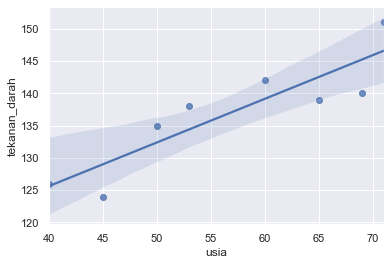

In [6]:
# Plot the Data
p = sns.regplot(df.usia, df.tekanan_darah)

# <center><font color="blue">Evaluasi $R^2$: Model VS Tidak Pakai Model?</font></center>

<img src="images/R_Square.png" width ="500"/>

- **$SSR=SST-SSE=\sum{(y_i-\bar{y}_i)^2}-\sum{(y_i-\hat{y}_i)^2}$**


# <center><font color="blue">Adjusted R-Squared? Why?</font></center>

<img src="images/Adjusted_R_Squared.png" width ="400"/>

# <center><font color="blue">Pengaruh Variabel Tak Bebas ke Model</font></center>

<img src="images/sig_var_di_Regresi.png" width ="500"/>

# <center><font color="blue">All Models Are Wrong</font></center>

<img src="images/08. George Box.png"  width ="500"/>

* Perfect/true-best model tidak ada, bahkan seringnya tidak diperlukan

<img src="images/reg_types.png" width ="600"/>

* image source: https://www.slideshare.net/mahakvijay3/basics-of-regression-analysis

# <center><font color="blue">Regresi Non-Linier</font></center>

* Why?
* Kapan tidak disarankan menambah kompleksitas model?
* Regression for insights VS regression for prediction.
* Masih linear terhadap parameter

<img src="images/linearisasi_regresi.png" width ="500"/>

* image source: https://sites.google.com/site/apphysics1online/appendices/2-data-analysis/graph-linearization

In [7]:
# Loading Data Sampel dari Modul
dta = sm.datasets.get_rdataset("Guerry", "HistData", cache=True)
df = dta.data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head(), df.shape, set(df['Region'])

(   Lottery  Literacy  Wealth Region
 0       41        37      73      E
 1       38        51      22      N
 2       66        13      61      C
 3       80        46      76      E
 4       79        69      83      E,
 (85, 4),
 {'C', 'E', 'N', 'S', 'W'})

In [8]:
# Set "Region" sebagai variabel Kategorik
res = ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
print(res.params)
print(res.summary())

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.07e-05
Time:                        07:48:31   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         

In [9]:
# Non Linear transformation
res = smf.ols(formula='Lottery ~ np.log(Literacy) + Wealth -1', data=df).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                Lottery   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              165.2
Date:                Fri, 27 Aug 2021   Prob (F-statistic):                    1.16e-29
Time:                        07:48:31   Log-Likelihood:                         -384.16
No. Observations:                  85   AIC:                                      772.3
Df Residuals:                      83   BIC:                                      777.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# <center><font color="blue">Studi Kasus (Boston House Pricing) - Another Property Case Study</font></center>

* Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

<img src="images/boston_housing.jpg" width ="400"/>

In [10]:
# Loading Data
boston = load_boston()
# Convert ke Pandas Dataframe
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Deskripsi Data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


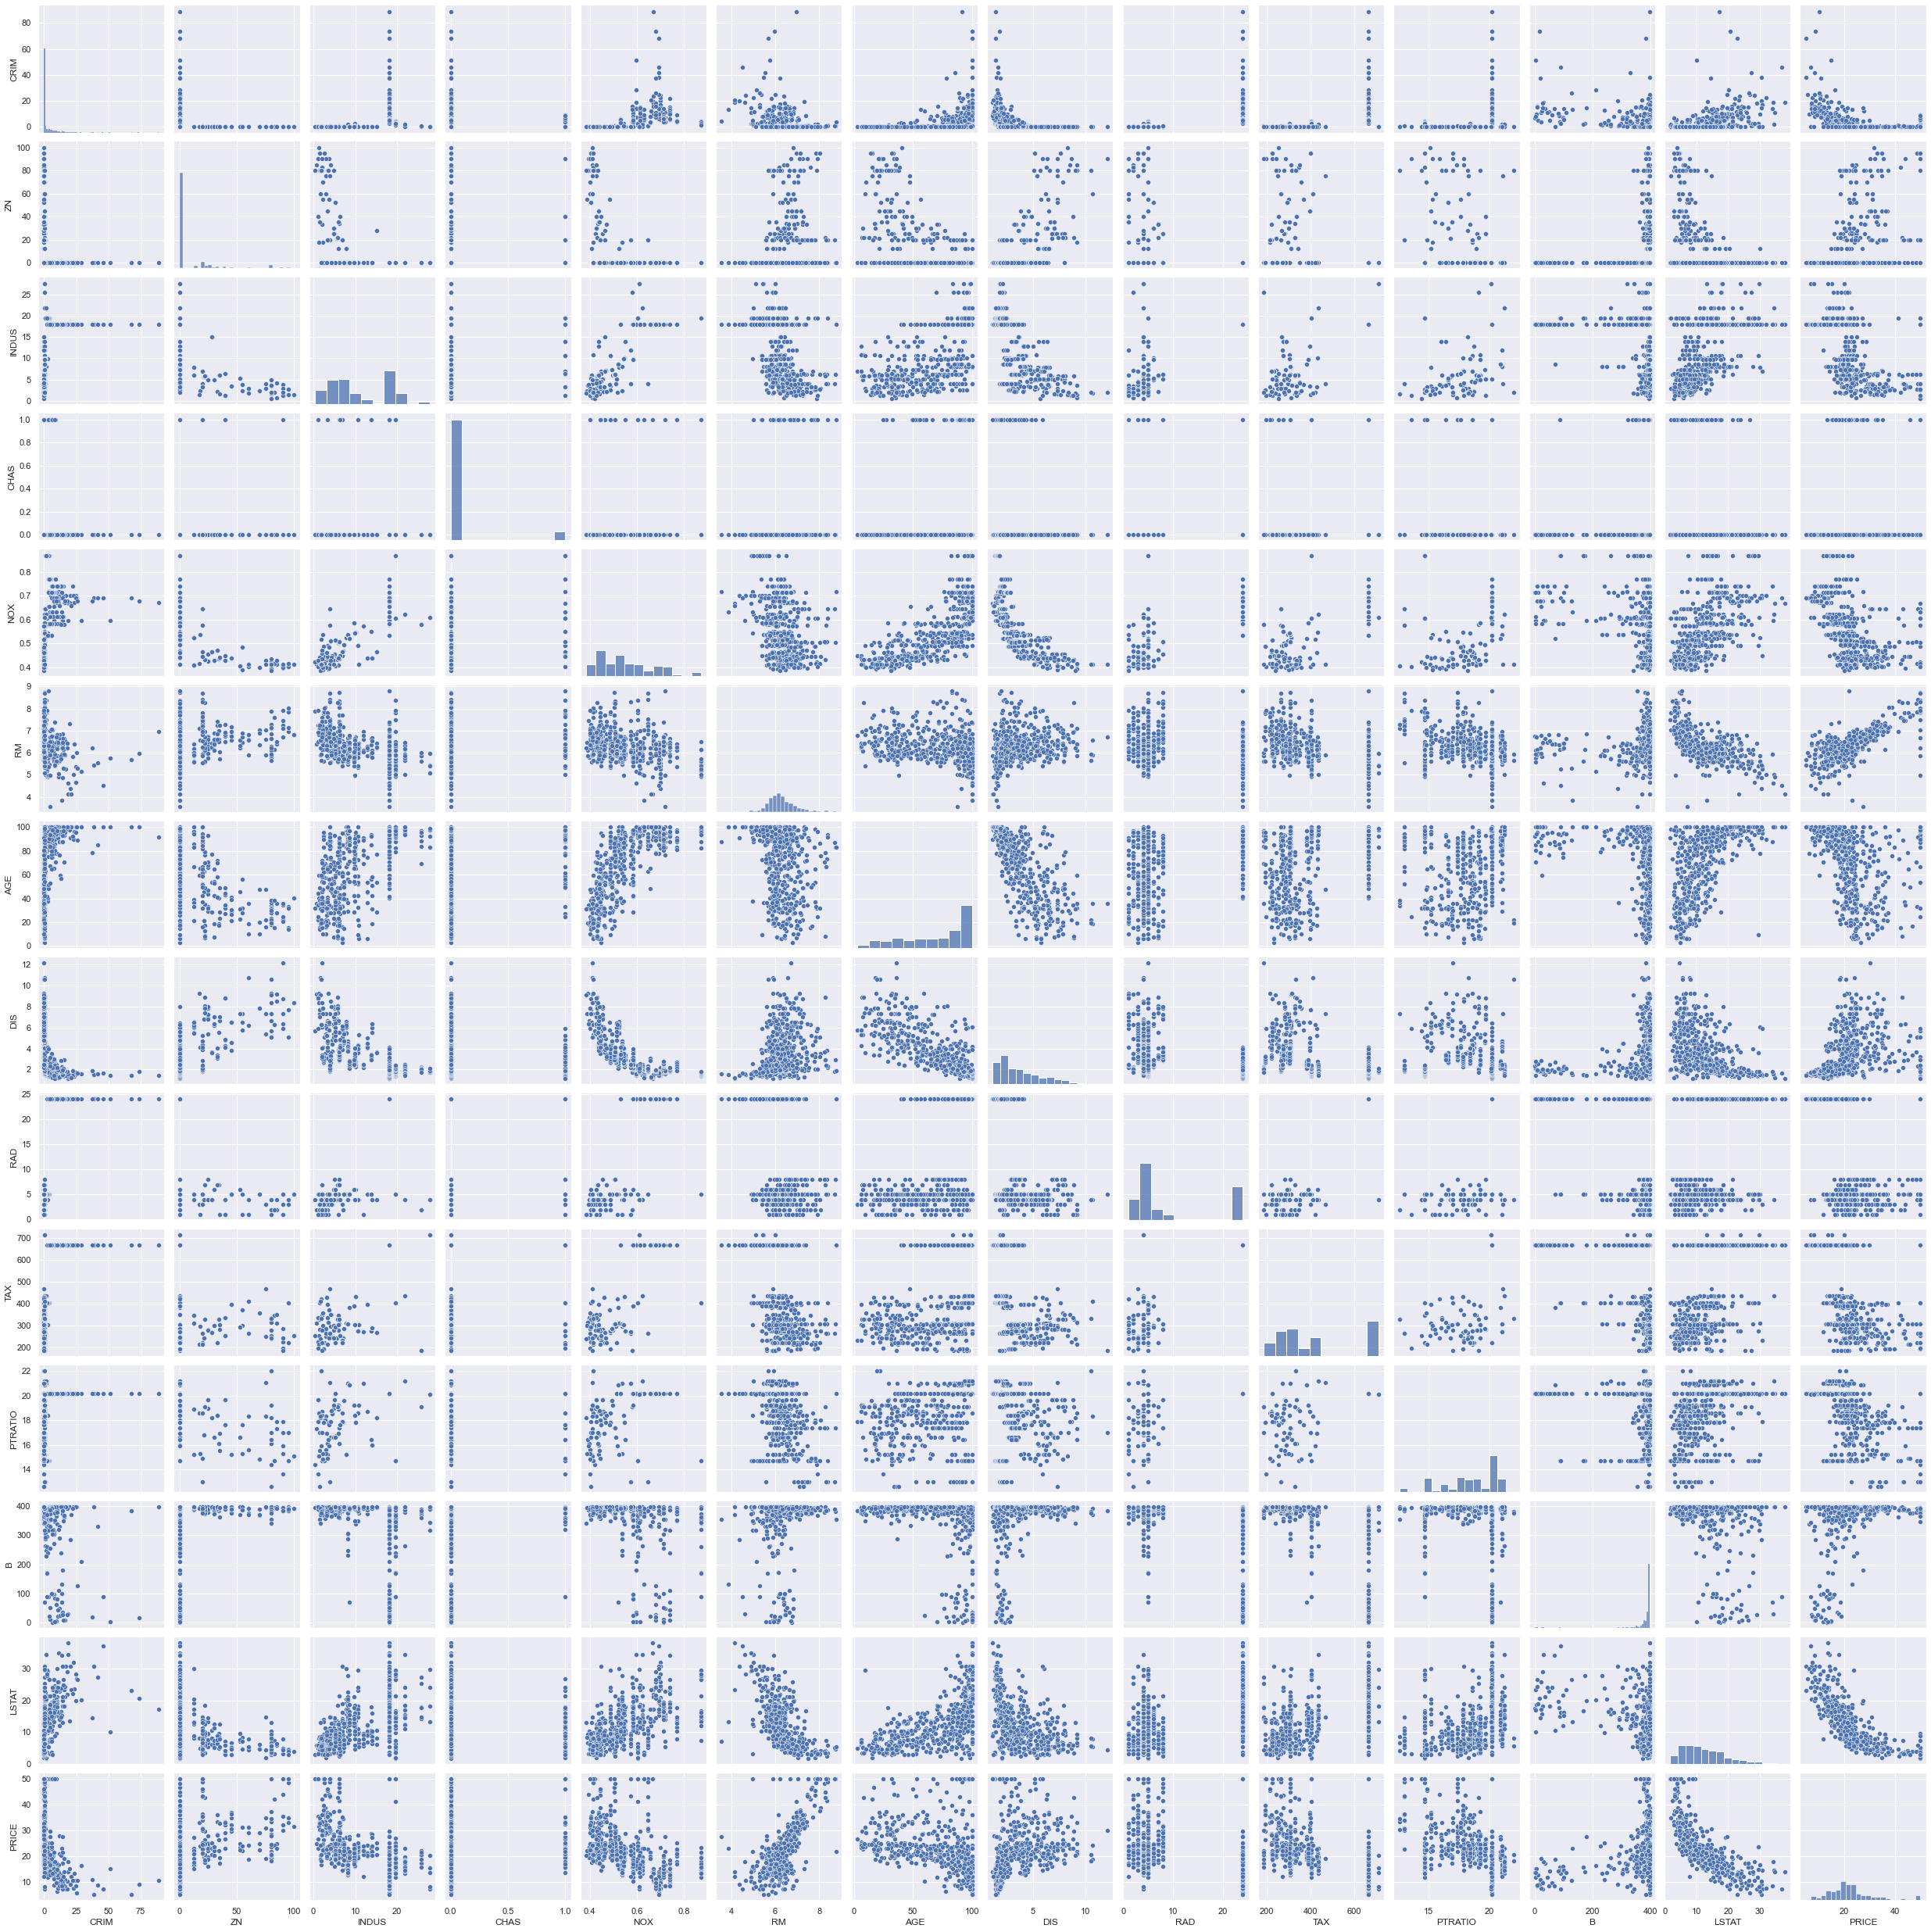

In [13]:
p = sns.pairplot(bos)

# <center><font color="blue">Checking Correlations between Predictors</font></center>

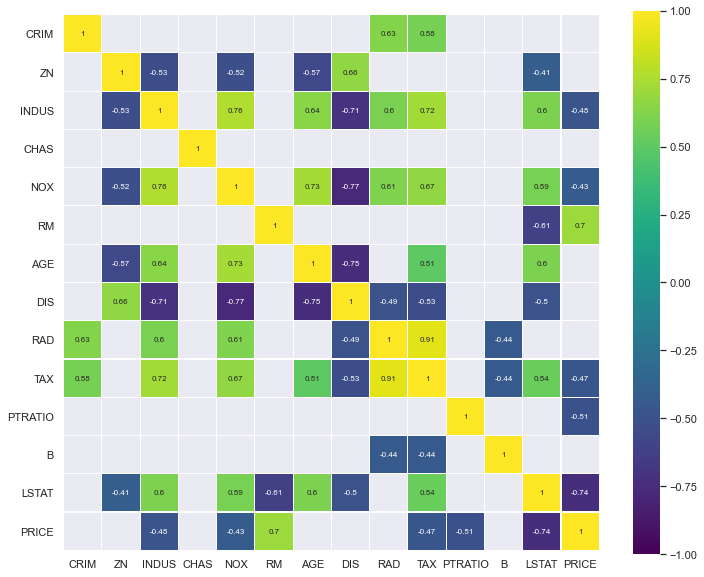

In [14]:
# HeatMap untuk menyelidiki korelasi
corr2 = bos.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [15]:
m = ols('PRICE ~ RM + PTRATIO + LSTAT ', bos).fit()
print(m.summary())
# Jangan lupa analisa dan interpretasi hasilnya

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          2.69e-123
Time:                        07:50:29   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

In [16]:
m2 = ols('np.log(PRICE) ~ RM + PTRATIO + LSTAT ', bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(PRICE)   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     418.4
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          3.96e-136
Time:                        07:50:29   Log-Likelihood:                 52.201
No. Observations:                 506   AIC:                            -96.40
Df Residuals:                     502   BIC:                            -79.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5469      0.164     21.632      0.0

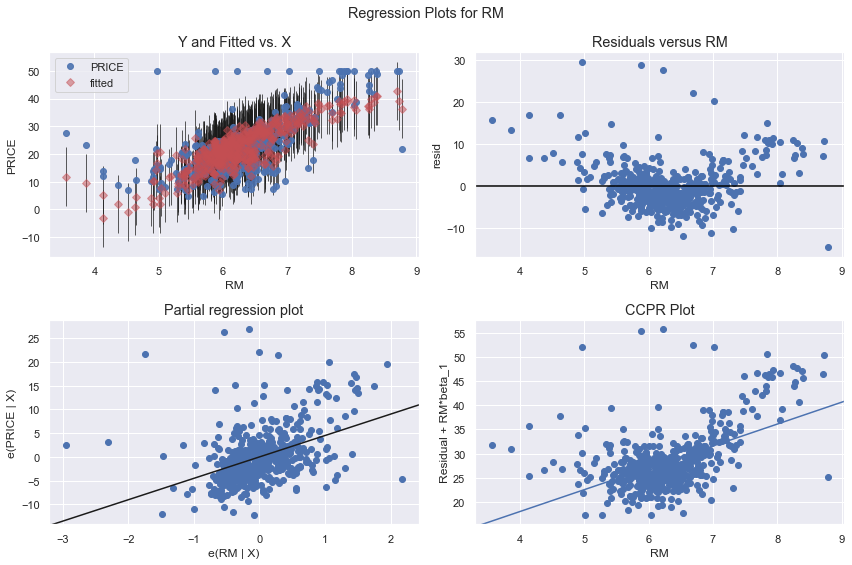

In [17]:
#define figure size
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(m,'RM', fig=fig)

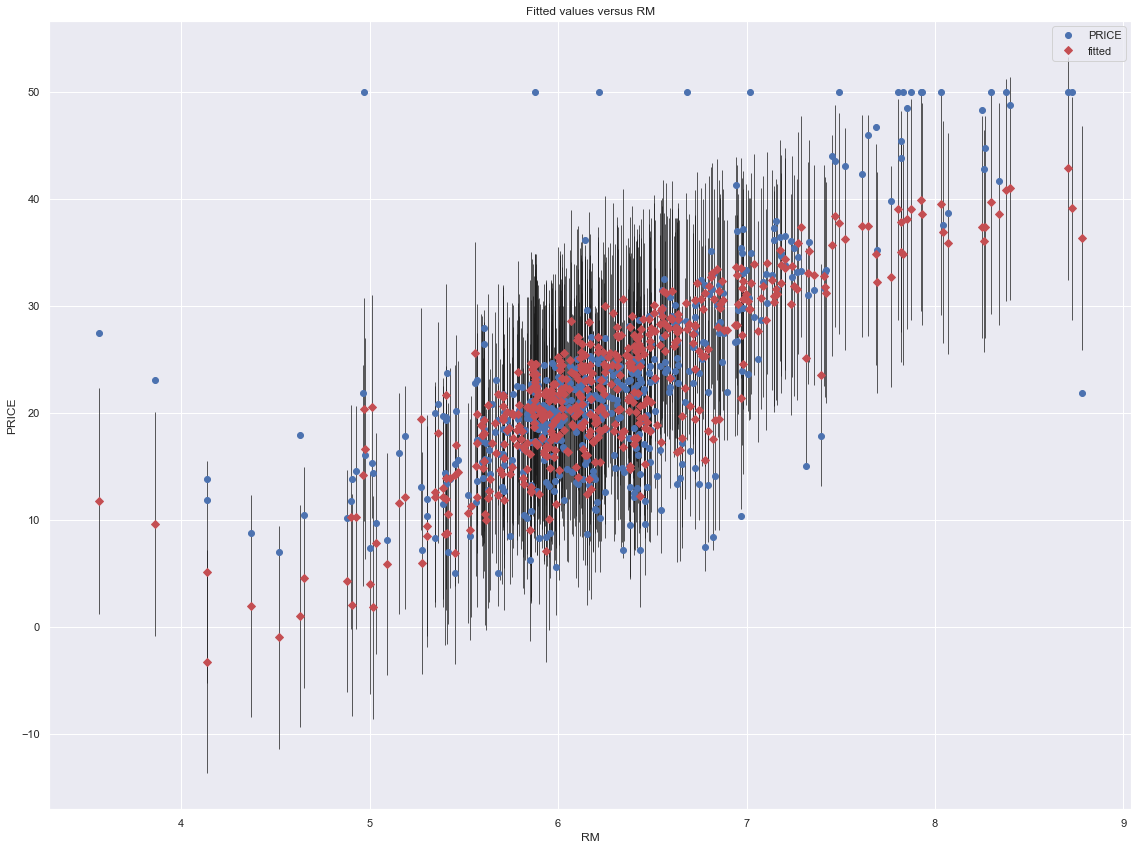

In [18]:
plt.rc("figure", figsize=(16,12))
plt.rc("font", size=14)
fig = sm.graphics.plot_fit(m, "RM")
fig.tight_layout(pad=1.0)

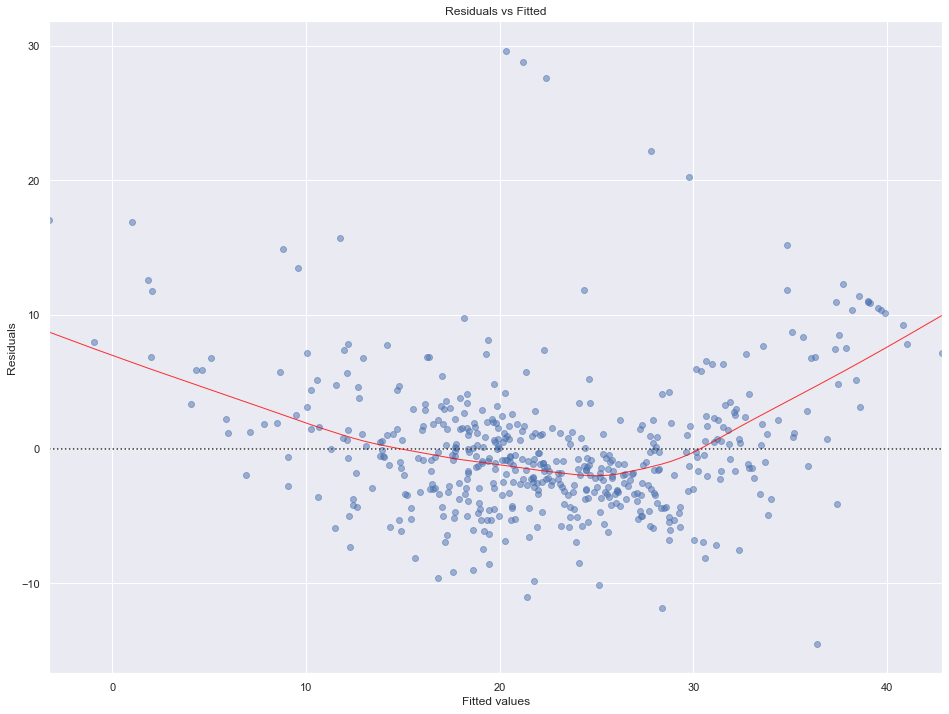

In [19]:
model_fitted_y = m.fittedvalues # model residuals
model_residuals = m.resid # normalized residuals
model_norm_residuals = m.get_influence().resid_studentized_internal # absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = m.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = m.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, bos["PRICE"], data=bos,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# <center><font color="blue">Variable Selection: Stepwise di Analisis Regresi</font></center>

<table><tr>
<td> <img src="images/forward-stepwise-algorithm.png" width ="300"/> </td>
<td> <img src="images/Stepwise.jpg" width ="300"/> </td>
</tr></table>

* image source: https://quantifyinghealth.com/stepwise-selection/
* image source: https://en.wikipedia.org/wiki/Stepwise_regression
* Cautions: https://towardsdatascience.com/stopping-stepwise-why-stepwise-selection-is-bad-and-what-you-should-use-instead-90818b3f52df

In [20]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [21]:
model = forward_selected(bos, 'PRICE')
print(model.model.formula)
print(model.rsquared_adj)

PRICE ~ LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + ZN + CRIM + RAD + TAX + 1
0.7348057723274566


In [22]:
# Interpretasi koefisien?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          5.54e-137
Time:                        07:50:39   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

Bandingkan Durbin-Watson in[15] dengan Durbin-Watson di [29]
Comment on Jarque-Bera

# <center><font color="blue">Data Scaling "for Insights"</font></center>

<table><tr>
<td> <img src="images/08_scaling_1.png" width ="300"/> </td>
<td> <img src="images/08_scaling_2.png" width ="300"/> </td>
<td> <img src="images/08_scaling_3.png" width ="300"/> </td>
</tr></table>

* Pentingnya "scaling" di Regresi (atau clustering) untuk mencari insight dari data
* image source: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

In [23]:
scaler = MinMaxScaler()
bos[['TAX', 'AGE', 'B']] = scaler.fit_transform(bos[['TAX', 'AGE', 'B']])
bos.head()
# Continue to Modelling

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,0.641607,4.0900,1.0,0.208015,15.3,1.000000,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,0.782698,4.9671,2.0,0.104962,17.8,1.000000,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,0.599382,4.9671,2.0,0.104962,17.8,0.989737,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,0.441813,6.0622,3.0,0.066794,18.7,0.994276,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,0.528321,6.0622,3.0,0.066794,18.7,1.000000,5.33,36.2


# <center><font color="blue">Pitfalls: Regresi Interpolation "bukan" Extrapolation (Forecasting/Peramalan)</font></center>

<img src="images/regression_interpolation_extrapolation.png" width ="300"/>

* image source: https://www.datasciencecentral.com/forum/topics/what-are-the-differences-between-prediction-extrapolation-and

# <center><font color="blue"> Akhir Modul 08 - Regression Analysis</font></center>

<hr />
<img src="images/meme-cartoon/meme_04_regression.png" style="height: 300px;"/>
